# Predicting heart diseases using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease on theis medical attributes.

Approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Date

The original data came from the Cleveland database from UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+Disease

Howevever, we've downloaded it in a formatted way from Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci


The original database contains 76 attributes, but here only 14 attributes will be used. Attributes (also called features) are the variables what we'll use to predict our target variable.

Attributes and features are also referred to as independent variables and a target variable can be referred to as a dependent variable.

## 3. Evaluation

> If we can reach at leat 85% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease

    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
        anything above 130-140 is typically cause for concern

    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern

    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes

    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber

    thalach - maximum heart rate achieved

    exang - exercise induced angina (1 = yes; 0 = no)
    
    oldpeak - ST depression induced by exercise relative to rest
        looks at stress of heart during excercise
        unhealthy heart will stress more
        
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)

    thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
        
    target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Note: No personal identifiable information (PPI) can be found in the dataset.

## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

# Model Evaluations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

import time
print(f'Last updated: {time.asctime()}')



Last updated: Wed Apr  3 16:25:13 2024


## Load Data

In [4]:
df = pd.read_csv("/content/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export  on dataset we're working with.

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types:
3. What's missinf from the data and how do you deal with it?
4. Where are the ouliers and why should you care about them?
5. How can you add, change or remove features  to get more out of your data?

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Checking Class balance

In [7]:
# Find out how many of each class there:

print(df.target.value_counts())


1    165
0    138
Name: target, dtype: int64


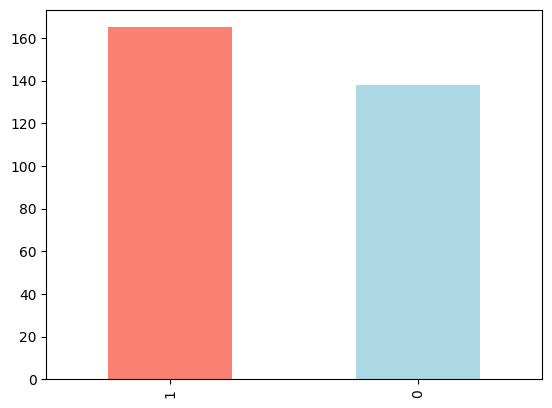

In [8]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# Are there any missing values?

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [12]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
# Compare target column with sex column

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

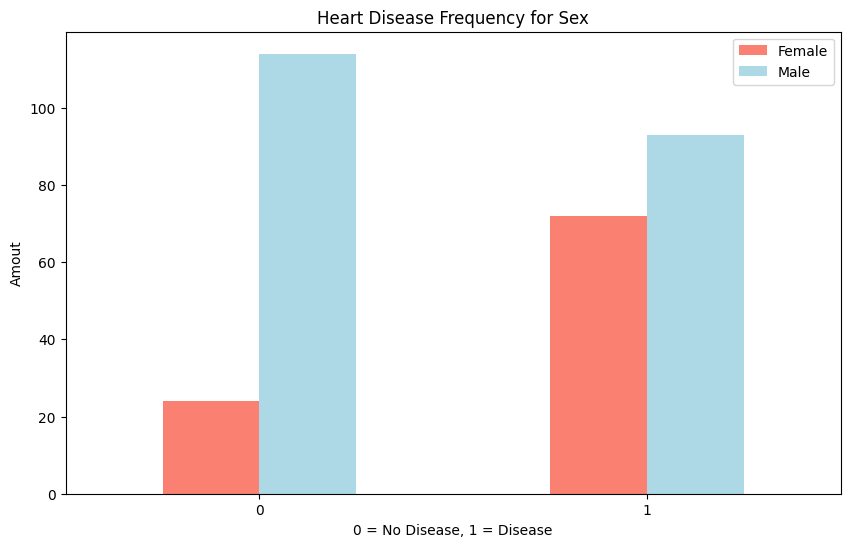

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amout")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

## Age vs. Max Heart Rate for Heart Disease

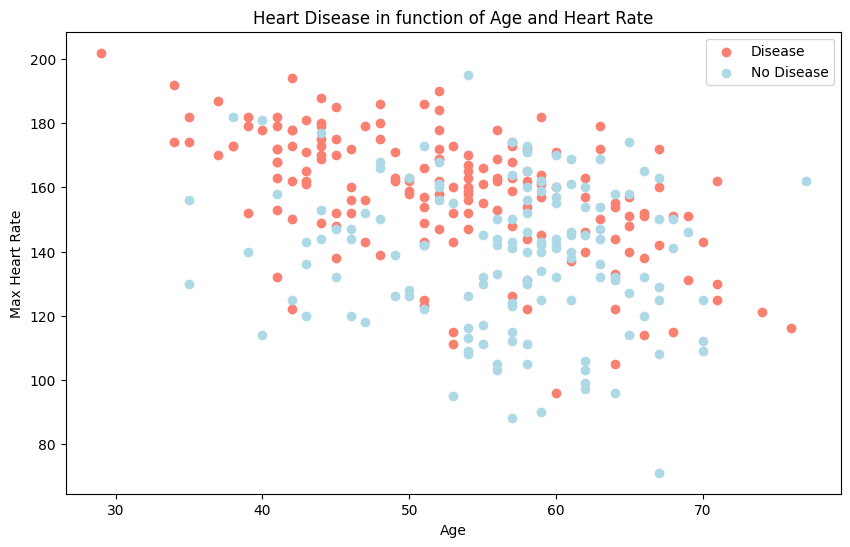

In [15]:
# Creating another figure:

plt.figure(figsize=(10, 6))

# Scatter with positive examples

plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")


# Scatter ith negative examples

plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue")

# Add some helpful info

plt.title("Heart Disease in function of Age and Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

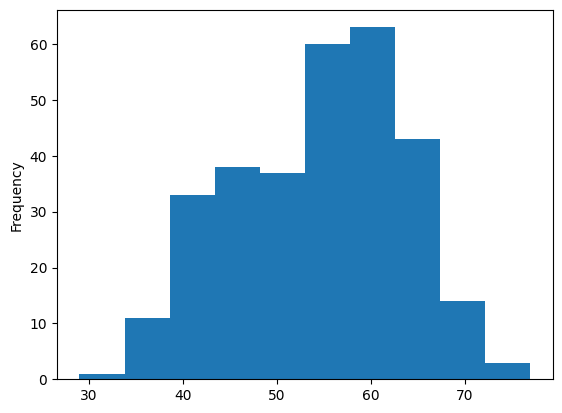

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()

## Heart Disease Frequency per Chest Pain Type

cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease


In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

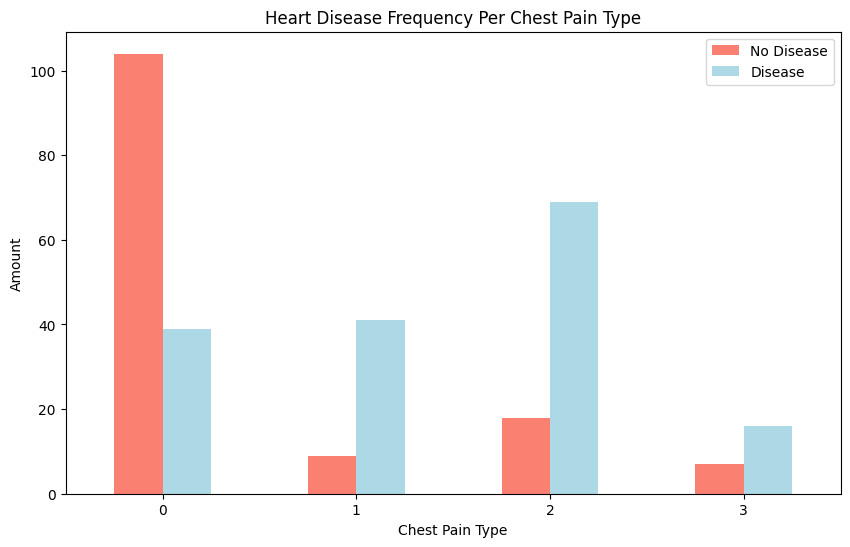

In [18]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:


# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


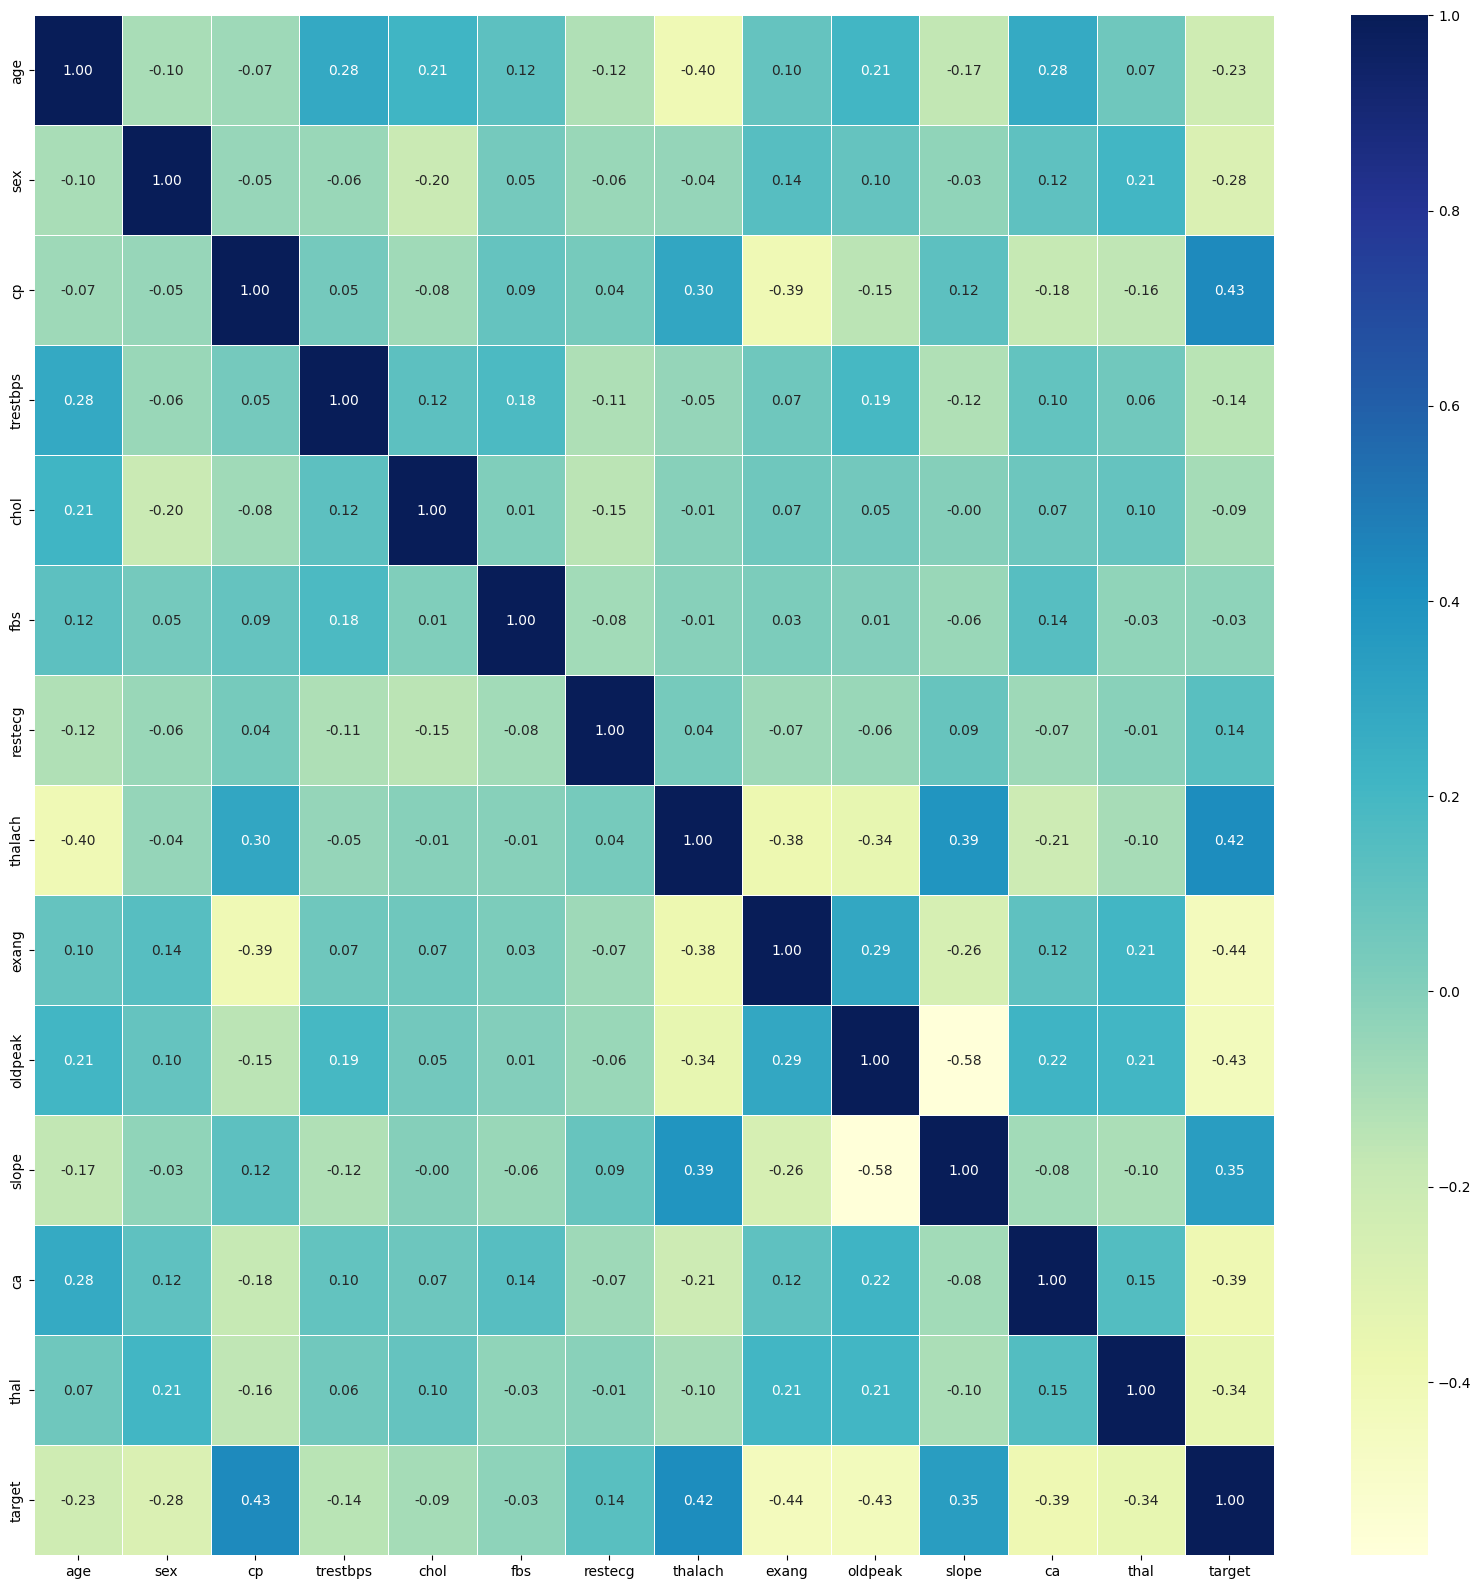

In [21]:


# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");


## 5. Modelling

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Creating Training and Test sets

# Split data into X and Y

X = df.drop("target", axis=1)

y = df["target"]

In [24]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler

In [27]:
# Split data into Train and Test sets

np.random.seed(42)

# Split into Train and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    int64  
 2   cp        242 non-null    int64  
 3   trestbps  242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    int64  
 6   restecg   242 non-null    int64  
 7   thalach   242 non-null    int64  
 8   exang     242 non-null    int64  
 9   oldpeak   242 non-null    float64
 10  slope     242 non-null    int64  
 11  ca        242 non-null    int64  
 12  thal      242 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 26.5 KB


Now we've got our data split into training and test sets.
It's time to build  a machine learning model.
We'll train it (find the patterns) on the training set.
And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. Random Forest Classifier
3. XGBoost


In [29]:
pipeline_xgboost = make_pipeline(StandardScaler(), XGBClassifier())
pipeline_xgboost.fit(X_train, y_train)
xgboost = pipeline_xgboost.score(X_test, y_test)


print(f'Score XGBoost: {pipeline_xgboost.score(X_test, y_test)}')

Score XGBoost: 0.819672131147541


In [46]:
pipeline_randomForest = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline_randomForest.fit(X_train, y_train)

random_forest = pipeline_randomForest.score(X_test, y_test)

print(f'Score RandomForestClassifier: {pipeline_randomForest.score(X_test, y_test)}')

Score RandomForestClassifier: 0.8688524590163934


In [47]:
pipeline_logisticReg = make_pipeline(StandardScaler(), LogisticRegression())
pipeline_logisticReg.fit(X_train, y_train)

logistic_reg = pipeline_logisticReg.score(X_test, y_test)

print(f'Score LogisticRegression: {pipeline_logisticReg.score(X_test, y_test)}')

Score LogisticRegression: 0.8852459016393442


In [48]:
model_scores = {
    'XGBoost': xgboost,
    'RandomForestClassifier': random_forest,
    'LogisticRegression': logistic_reg
}

### Models Comparison

<Axes: >

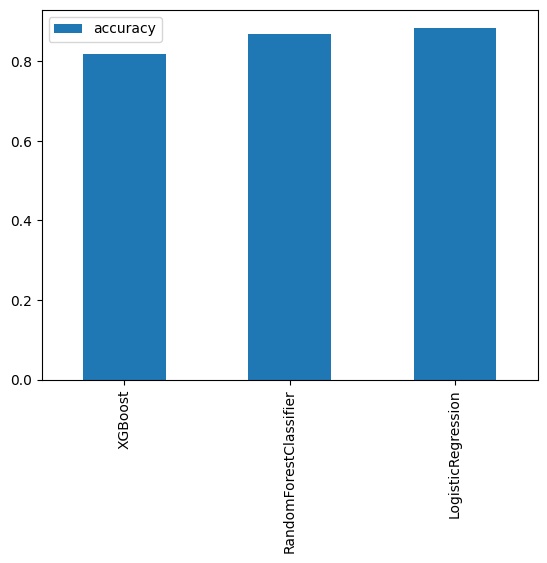

In [49]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()

Now we've got a baseline model and we know a model's first predictions aren't always what we should based our next steps off.

Plan:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)



### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression()
* RandomForestClassifier()

In [50]:
data_pipeline = Pipeline([
    ('Preprocess', StandardScaler())
])

X_train = data_pipeline.fit_transform(X_train)
X_test = data_pipeline.fit_transform(X_test)

In [36]:
# Create a hyperparameter grid for LogisticRegression()
logistic_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForesClassifier()
random_forest_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [37]:
# Tune LogisticRegression()

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=logistic_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [38]:
rs_log_reg.best_params_



{'solver': 'liblinear', 'C': 1.623776739188721}

In [39]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [117]:
# Tune  RandomForestClassifier()

In [40]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=random_forest_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [41]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [42]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

Since LogisticRegression model provides the best scores so far,
we'll try and improve again using GridSearchCV

In [43]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=logistic_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [44]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [45]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                           param_grid=random_forest_grid,
                           cv=5,
                           verbose=True)

# Fit random hyperparameter search model
gs_rf.fit(X_train, y_train)

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [53]:
# Make predictions with tuned model
y_pred_logistic = gs_log_reg.predict(X_test)

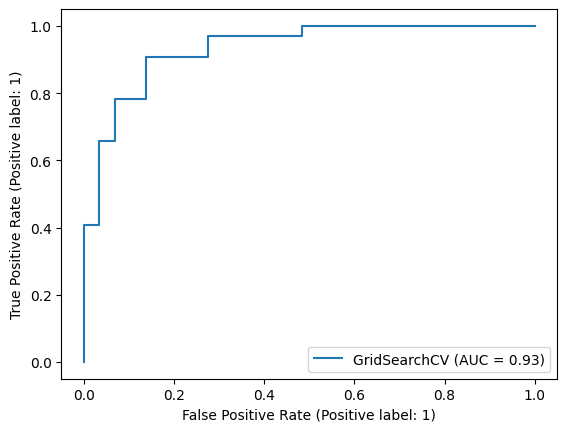

In [56]:
# Plot ROC curve and calculate AUC metric Logistic Regression

RocCurveDisplay.from_estimator(estimator=gs_log_reg,
                               X=X_test,
                               y=y_test);

In [57]:
# Confusion matrix

print(confusion_matrix(y_test, y_pred_logistic))

[[25  4]
 [ 3 29]]


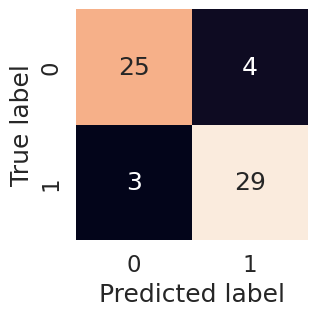

In [59]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_pred_logistic):
        """
        Plots a confusion matrix using Seaborn's heatmap().
        """
        fig, ax = plt.subplots(figsize=(3, 3))
        ax = sns.heatmap(confusion_matrix(y_test, y_pred_logistic),
                         annot=True, # Annotate the boxes
                         cbar=False)
        plt.xlabel("Predicted label") # predictions go on the x-axis
        plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(y_test, y_pred_logistic)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and F1-Score

In [60]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using Cross-Validation

In [61]:
# Check best hyperparameters
gs_log_reg.best_params_



{'C': 1.623776739188721, 'solver': 'liblinear'}

In [62]:
# Create a new classifier with best parameters

clf = LogisticRegression(C=1.623776739188721,
                         solver="liblinear")

In [64]:
# Cross-validated accuracy score

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc


array([0.81967213, 0.86885246, 0.85245902, 0.85      , 0.71666667])

We have 5 metrics here, let's take the avarage

In [65]:
# Avarage
cv_acc = np.mean(cv_acc)
cv_acc




0.8215300546448088

In [67]:
# Cross-validated-precision

cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="precision") # precision as scoring
cv_precision = np.mean(cv_precision)
cv_precision


0.817900063251107

In [69]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="recall") # recall as scoring
cv_recall = np.mean(cv_recall)
cv_recall


0.8727272727272727

In [70]:
# Cross-validated F1-score

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="f1") # f1 as scoring
cv_f1 = np.mean(cv_f1)
cv_f1

0.8431741323998502

## Visualize Cross-validated metrics

<Axes: title={'center': 'Cross-Validated Metrics'}>

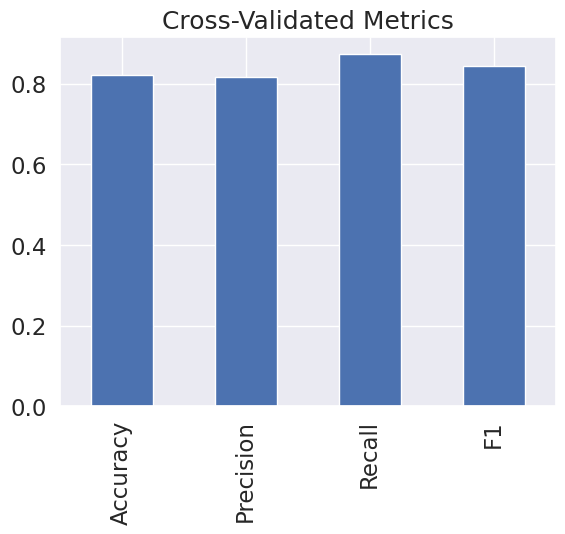

In [71]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False)

### Feature Importance

"Which features contributed most to the outcomes of the model and how did they contribute?"

Let's find the feature importance for our LogisticRegression model...

In [72]:
# Fit an instance of LogisticRegression

gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

clf.fit(X_train, y_train)


LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [73]:
# Cheking coef_
clf.coef_

array([[-0.0939301 , -0.63310113,  0.67646418, -0.2187263 , -0.12398021,
         0.0695847 ,  0.21839469,  0.34935557, -0.46711185, -0.57650696,
         0.37009186, -0.65537893, -0.48843516]])

In [74]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': -0.09393009632562488,
 'sex': -0.6331011333952464,
 'cp': 0.6764641808688757,
 'trestbps': -0.2187263036074324,
 'chol': -0.12398021470750731,
 'fbs': 0.06958470285562877,
 'restecg': 0.2183946867681563,
 'thalach': 0.3493555736979833,
 'exang': -0.46711185486832096,
 'oldpeak': -0.5765069619553824,
 'slope': 0.3700918620345391,
 'ca': -0.6553789311554196,
 'thal': -0.4884351584870811}

<Axes: title={'center': 'Feature Importance'}>

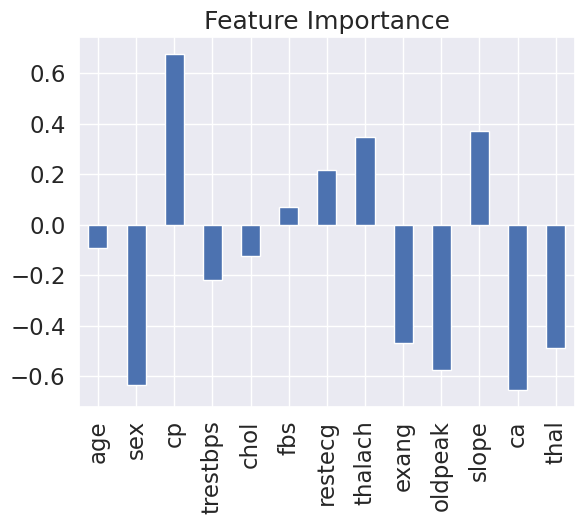

In [75]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False)

In [76]:
pd.crosstab(df["sex"], df["target"])



target,0,1
sex,,
0,24,72
1,114,93


In [77]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])



target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment


* 0: Upsloping: better heart rate with excercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart



## Experimentation


We can continue improving our current model (by collecting more data) or we can try a better model, like CatBoost or XGBoost


## Conclusion

We've got 88% of accuracy using our trained machine learning model.
As said before, we can copntinue improving the current model or we can jump in another model like CatBoost.

For this project purpose, we're going to stay with our current model.